# Visual-based road detection

* [Work Description](files/intro-docs/VCOM_2015-2016_Trabalho_1_v02.pdf)

This project focus on finding and extracting delimiter features (edges) present on a road. This ability is of great importance in computer vision field, namely in autonomous driver applications.

In this report, the evolution of the algorithm is shown throughout the iteration over images that, intuitively, represent increment of complexity in each image iteration.

## Process
* Sharpen image
    * **e.g.** CLAHE
* Reduce noise (assume Gaussian noise)
    * Preserve the edges
* Highlight edges
    * **e.g.** Canny
* Extract lines
* Find Intersection point


### Possible improvements
* Add Gaussian noise and test performance of the algorithm
* Morphological gradient
* Histogram retroprojection

*Note:* test with different image representations, in order to extract channels where the image is easier to parse.

In [13]:
import cv2

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from operator import itemgetter

import numpy as np

# Determining the Vanishing Point
## Start with a simple image

In [14]:
img_simple = cv2.imread("pics/simple.jpg")
img_simple = cv2.resize(img_simple, (600, 400))

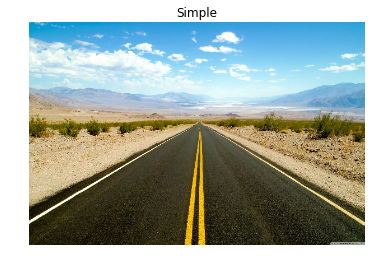

In [15]:
img_simple_show = cv2.cvtColor(img_simple, cv2.COLOR_BGR2RGB)
plt.axis('off'); plt.title('Simple'); plt.imshow(img_simple_show)

## Apply Canny Algorithm to Highlight Edges

In [16]:
img_simple_hls = cv2.cvtColor(img_simple, cv2.COLOR_BGR2HLS)
img_simple_light = cv2.Canny(img_simple_hls[:, :, 1], 150, 300, L2gradient=True)

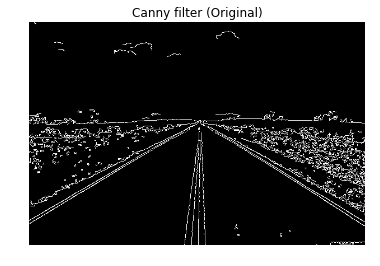

In [17]:
plt.axis('off'); plt.title("Canny filter (Original)"); plt.imshow(img_simple_light, cmap='gray')

In [18]:
img_simple_edges = img_simple.copy()
lines = cv2.HoughLines(img_simple_light, 1, np.pi/180.0, 180)

In [19]:
lines = sorted(lines[:, 0, :], key=itemgetter(1))
lines = [lines[0], lines[-1]]

In [20]:
m_l = (- np.cos(lines[0][1]) / np.sin(lines[0][1]))
m_r = (- np.cos(lines[1][1]) / np.sin(lines[1][1]))
b_l = lines[0][0] / np.sin(lines[0][1])
b_r = lines[1][0] / np.sin(lines[1][1])

vp_x = (b_l - b_r) / (m_r - m_l)
vp_y = m_l * vp_x + b_l

_ = cv2.circle(img_simple_edges, (vp_x, vp_y), 10, (0, 0, 255), -2)
_ = cv2.circle(img_simple_edges, (vp_x, vp_y), 8, (255, 255, 255), -2)

In [21]:
for rho, theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    
    if theta > np.pi / 2:
        x1 = vp_x
        y1 = vp_y
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
    else:
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = vp_x
        y2 = vp_y

    cv2.line(img_simple_edges, (x1, y1), (x2, y2), (0, 0, 255), 2)

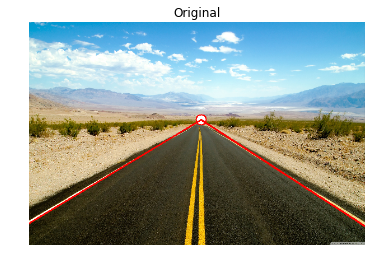

In [22]:
img_simple_edges_show = cv2.cvtColor(img_simple_edges, cv2.COLOR_BGR2RGB)
plt.axis('off'); plt.title('Original'); plt.imshow(img_simple_edges_show)

In almost perfect examples, this simple process works very well.